In [1]:
import pandas as pd
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3

In [2]:
# Global options

FDR = 0.05

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,14)
# ylim=(-10, 4)
alpha=1
# marker='o'
s=10
legend=False
linewidth=0

In [3]:
def prepare_df(df_path, df_name):

    """Read in information from dataframe"""

    # read in df1
    df = pd.read_csv(df_path, header=0, sep="\t")
    # Mark significants
    df["Significant"]  = "No"
    df.loc[(df["FDR"] < 0.05), "Significant"] = "FDR<0.05"
    # set id as index
    df.set_index("id", inplace=True)
    # rename columns
    df.columns = df.columns + "_" + df_name
    # reset index
    df.reset_index(inplace=True)

    return df

In [4]:
def merge_df(df_1, df_2, df_1_name, df_2_name):
    
    """Merge dataframes"""
    
    df = pd.merge(df_1, df_2, on="id", how="outer")
    
    df["Significant"] = "No"
    
    df.loc[(df[f"FDR_{df_1_name}"]<0.05),
               "Significant"] = f"FDR_{df_1_name}<0.05"
    
    df.loc[(df[f"FDR_{df_2_name}"]<0.05),
               "Significant"] = f"FDR_{df_2_name}<0.05"
    
    df.loc[(df[f"FDR_{df_1_name}"]<0.05) &
               (df[f"FDR_{df_2_name}"]<0.05),
                "Significant"] = f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"
    
    return df

In [5]:
def prepare_sc_plot(df, df_1_name, df_2_name):
    sns_plot = sns.scatterplot(x=f"logFC_{df_1_name}",
                               y=f"logFC_{df_2_name}",
                               data=df.sort_values("Significant", ascending=False),
                               s=s,
                               hue="Significant",
                               hue_order=["No", f"FDR_{df_1_name}<0.05", f"FDR_{df_2_name}<0.05", f"FDR_{df_1_name}<0.05\nFDR_{df_2_name}<0.05"],
                               palette=["gray", "blue", "orange", "red"],
                               alpha=alpha,
                               x_jitter=x_jitter,
                               y_jitter=y_jitter,
                               linewidth=linewidth)
#     sns_plot.set(xlim=xlim, ylim=ylim)

    return sns_plot

In [6]:
!ls ../results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__WT__Dpf_3_null/DE_edgeR/

BCV.pdf  final_table.tsv			 ma_plot.pdf
BCV.png  final_table_FDR_low.tsv		 ma_plot.png
MDS.pdf  final_table_FDR_low_with_gene_info.tsv  volcano_plot.pdf
MDS.png  final_table_with_gene_info.tsv		 volcano_plot.png


In [7]:
prefix = "../results/filter/DE_htseq_count__alignment_sorted_filtered_unique_mappers__reverse__"

In [20]:
Dpf_3_null_path = prefix + "WT__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_null_name = "Dpf_3_null"

Dpf_3_null_A_B_C_path = prefix + "WT_A_B_C__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_null_A_B_C_name = "Dpf_3_null_A_B_C"

Dpf_3_null_D_E_F_path = prefix + "WT_D_E_F__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_null_D_E_F_name = "Dpf_3_null_D_E_F"

Dpf_3_null_B_D_F_path = prefix + "WT_B_D_F__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_null_B_D_F_name = "Dpf_3_null_B_D_F"

Dpf_3_null_A_C_E_path = prefix + "WT_A_C_E__Dpf_3_null/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_null_A_C_E_name = "Dpf_3_null_A_C_E"

Dpf_3_S784A_D_E_F_path = prefix + "WT_D_E_F__Dpf_3_S784A/DE_edgeR/final_table_with_gene_info.tsv"
Dpf_3_S784A_D_E_F_name = "Dpf_3_S784A_D_E_F"

In [21]:
# read in dataframe
df_Dpf_3_null = prepare_df(Dpf_3_null_path, Dpf_3_null_name)
df_Dpf_3_null_A_B_C = prepare_df(Dpf_3_null_A_B_C_path, Dpf_3_null_A_B_C_name)
df_Dpf_3_null_D_E_F = prepare_df(Dpf_3_null_D_E_F_path, Dpf_3_null_D_E_F_name)
df_Dpf_3_null_B_D_F = prepare_df(Dpf_3_null_B_D_F_path, Dpf_3_null_B_D_F_name)
df_Dpf_3_null_A_C_E = prepare_df(Dpf_3_null_A_C_E_path, Dpf_3_null_A_C_E_name)
df_Dpf_3_S784A_D_E_F = prepare_df(Dpf_3_S784A_D_E_F_path, Dpf_3_S784A_D_E_F_name)

In [22]:
df_Dpf_3_null_sig = df_Dpf_3_null[(df_Dpf_3_null["Significant_Dpf_3_null"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_A_B_C_sig = df_Dpf_3_null_A_B_C[(df_Dpf_3_null_A_B_C["Significant_Dpf_3_null_A_B_C"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_D_E_F_sig = df_Dpf_3_null_D_E_F[(df_Dpf_3_null_D_E_F["Significant_Dpf_3_null_D_E_F"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_B_D_F_sig = df_Dpf_3_null_B_D_F[(df_Dpf_3_null_B_D_F["Significant_Dpf_3_null_B_D_F"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_null_A_C_E_sig = df_Dpf_3_null_A_C_E[(df_Dpf_3_null_A_C_E["Significant_Dpf_3_null_A_C_E"]=="FDR<0.05")]["id"].tolist()
df_Dpf_3_S784A_D_E_F_sig = df_Dpf_3_S784A_D_E_F[(df_Dpf_3_S784A_D_E_F["Significant_Dpf_3_S784A_D_E_F"]=="FDR<0.05")]["id"].tolist()

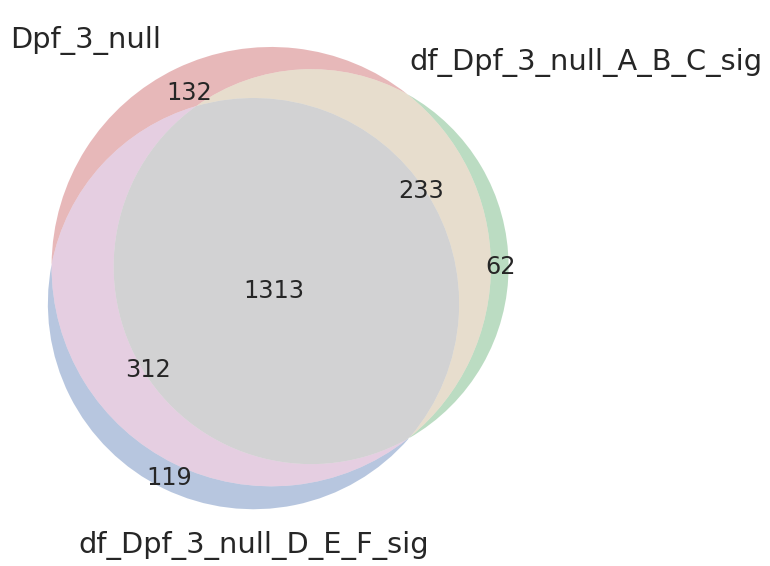

In [23]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn3([set(df_Dpf_3_null_sig), set(df_Dpf_3_null_A_B_C_sig), set(df_Dpf_3_null_D_E_F_sig)], ['Dpf_3_null', 'df_Dpf_3_null_A_B_C_sig', 'df_Dpf_3_null_D_E_F_sig'])

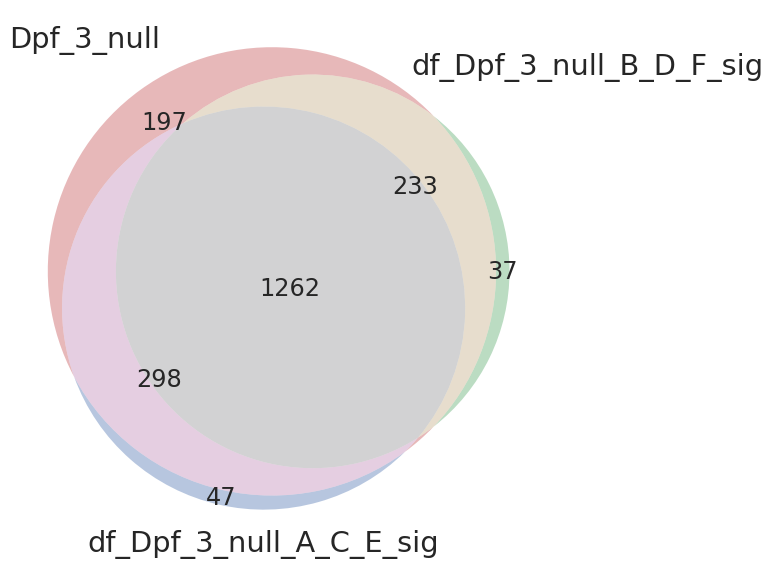

In [24]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn3([set(df_Dpf_3_null_sig), set(df_Dpf_3_null_B_D_F_sig), set(df_Dpf_3_null_A_C_E_sig)], ['Dpf_3_null', 'df_Dpf_3_null_B_D_F_sig', 'df_Dpf_3_null_A_C_E_sig'])

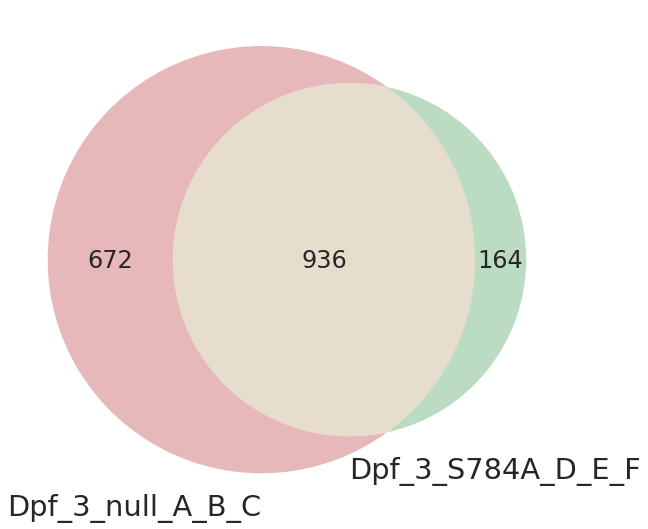

In [25]:
sns.set_style("white")
plt.figure(figsize=(10,10))
venn2([set(df_Dpf_3_null_A_B_C_sig), set(df_Dpf_3_S784A_D_E_F_sig)], ['Dpf_3_null_A_B_C', 'Dpf_3_S784A_D_E_F'])

# scatterplots

In [26]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F = merge_df(df_Dpf_3_null_A_B_C, df_Dpf_3_null_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_null_D_E_F_name)

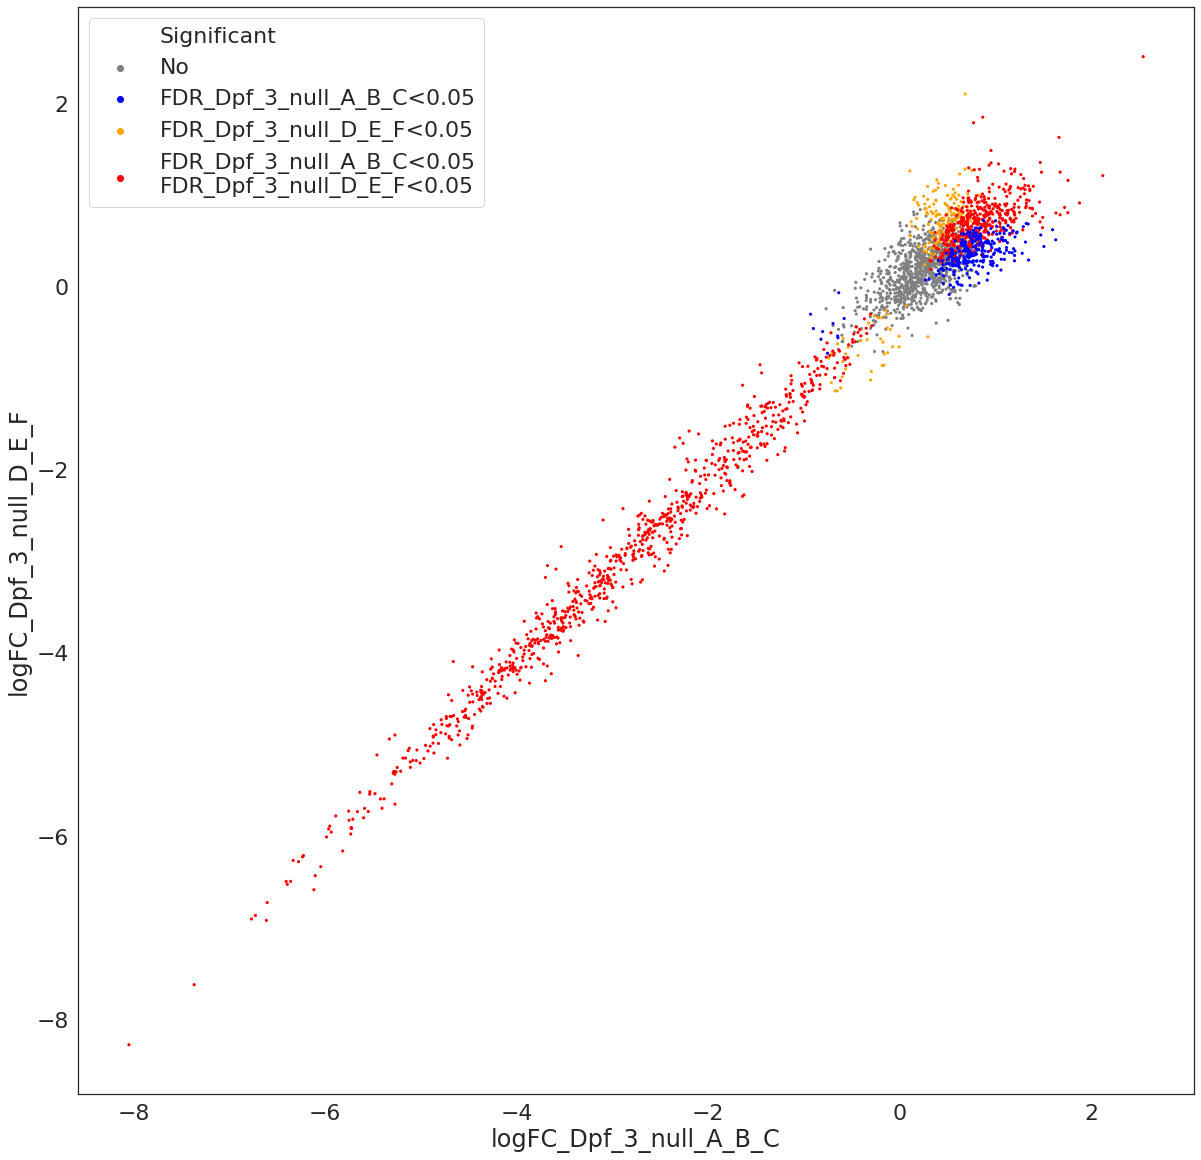

In [27]:
plt.figure(figsize=(20,20))
df_Dpf_3_null_lm = prepare_sc_plot(df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_null_D_E_F_name)

In [28]:
df_Dpf_3_null_A_B_C_with_df_Dpf_3_null_D_E_F["Significant"].value_counts()

No                                                      1532
FDR_Dpf_3_null_A_B_C<0.05\nFDR_Dpf_3_null_D_E_F<0.05    1313
FDR_Dpf_3_null_D_E_F<0.05                                431
FDR_Dpf_3_null_A_B_C<0.05                                295
Name: Significant, dtype: int64

# scatterplots null and point mutant

In [29]:
df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F = merge_df(df_Dpf_3_null_A_B_C, df_Dpf_3_S784A_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_S784A_D_E_F_name)

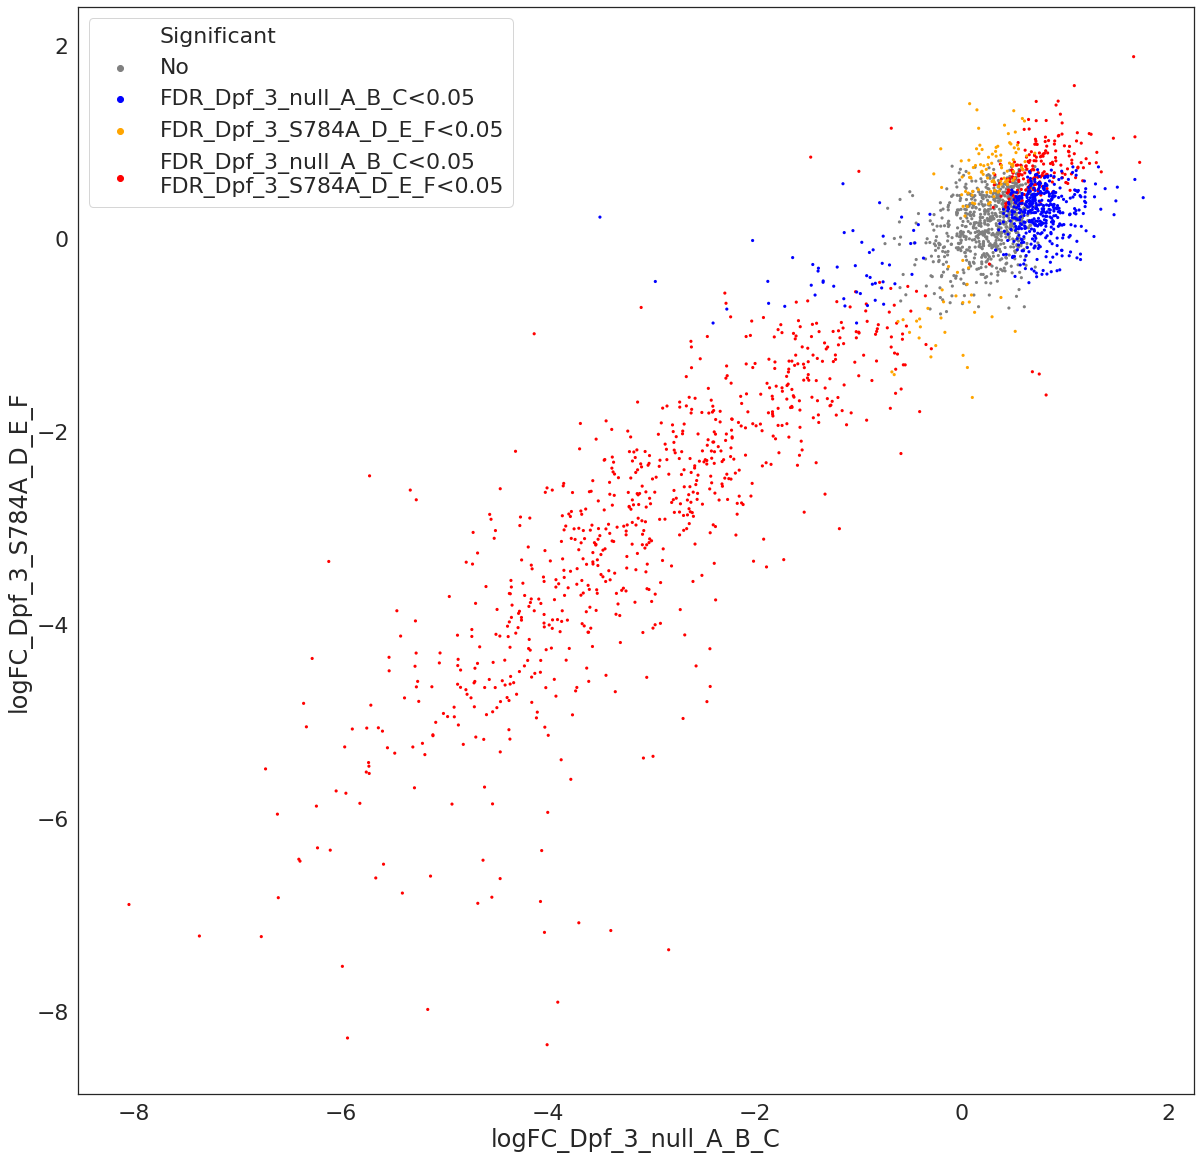

In [30]:
plt.figure(figsize=(20,20))
df_Dpf_3_null_lm = prepare_sc_plot(df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F, Dpf_3_null_A_B_C_name, Dpf_3_S784A_D_E_F_name)

In [34]:
df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F["Significant"].value_counts()

No                                                       1088
FDR_Dpf_3_null_A_B_C<0.05\nFDR_Dpf_3_S784A_D_E_F<0.05     936
FDR_Dpf_3_null_A_B_C<0.05                                 672
FDR_Dpf_3_S784A_D_E_F<0.05                                164
Name: Significant, dtype: int64

In [33]:
df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F.to_csv("df_Dpf_3_null_A_B_C_with_Dpf_3_S784A_D_E_F.csv", header=True, index=False)